<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

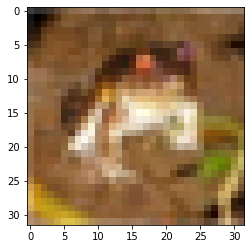

In [6]:
# FROG
plt.imshow(x_train[0])

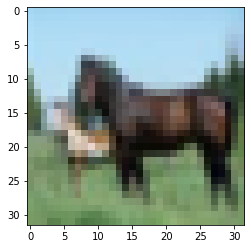

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [40]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 6s 129us/sample - loss: 1.5199 - accuracy: 0.4534 - val_loss: 1.3075 - val_accuracy: 0.5498
Epoch 2/15
50000/50000 [==============================] - 6s 113us/sample - loss: 1.1533 - accuracy: 0.5974 - val_loss: 1.1743 - val_accuracy: 0.5795
Epoch 3/15
50000/50000 [==============================] - 6s 113us/sample - loss: 0.9973 - accuracy: 0.6571 - val_loss: 1.0654 - val_accuracy: 0.6274
Epoch 4/15
50000/50000 [==============================] - 6s 113us/sample - loss: 0.8939 - accuracy: 0.6938 - val_loss: 0.9890 - val_accuracy: 0.6568
Epoch 5/15
50000/50000 [==============================] - 6s 113us/sample - loss: 0.8153 - accuracy: 0.7177 - val_loss: 0.9994 - val_accuracy: 0.6601
Epoch 6/15
50000/50000 [==============================] - 6s 113us/sample - loss: 0.7567 - accuracy: 0.7445 - val_loss: 1.0006 - val_accuracy: 0.6600
Epoch 7/15
50000/50000 [==========================

In [42]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [43]:
losses = pd.DataFrame(model.history.history)

In [44]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.519891,0.45336,1.307454,0.5498
1,1.153265,0.59738,1.174292,0.5795
2,0.997324,0.65712,1.065440,0.6274
3,0.893939,0.69382,0.988995,0.6568
4,0.815260,0.71768,0.999398,0.6601


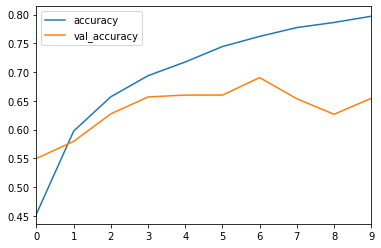

In [45]:
losses[['accuracy','val_accuracy']].plot()

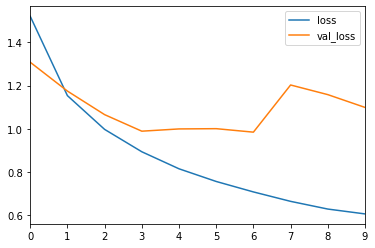

In [46]:
losses[['loss','val_loss']].plot()

In [27]:
model.metrics_names

['loss', 'acc']

In [47]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0987777906417846, 0.6544]


In [48]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1000
           1       0.81      0.77      0.79      1000
           2       0.48      0.61      0.54      1000
           3       0.54      0.39      0.46      1000
           4       0.70      0.55      0.61      1000
           5       0.55      0.61      0.58      1000
           6       0.74      0.76      0.75      1000
           7       0.88      0.55      0.68      1000
           8       0.58      0.92      0.71      1000
           9       0.77      0.71      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[665,  25,  50,   5,   8,   9,   9,   3, 206,  20],
       [ 22, 769,  13,   9,   1,   5,  10,   1, 105,  65],
       [ 83,   8, 613,  35,  45,  71,  60,   9,  59,  17],
       [ 34,  22, 138, 394,  48, 210,  62,  11,  58,  23],
       [ 41,   4, 145,  49, 550,  58,  67,  24,  54,   8],
       [ 20,   7,  99, 131,  37, 614,  39,  16,  25,  12],
       [ 15,  10,  74,  52,  30,  19, 757,   1,  30,  12],
       [ 32,   7, 104,  44,  69, 122,  12, 548,  23,  39],
       [ 27,  13,  14,   4,   3,   3,   1,   0, 924,  11],
       [ 39,  89,  17,   8,   0,   9,   3,   7, 118, 710]], dtype=int64)

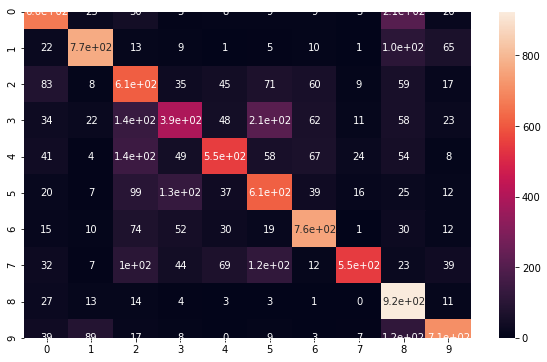

In [54]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [65]:
my_image = x_test[16]

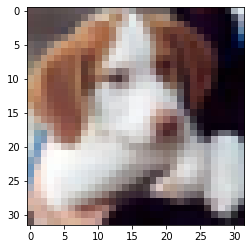

In [66]:
plt.imshow(my_image)

In [68]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html